# Introduction to Regresssion with Neural Networks in TensorFlow

There are many definitions for a regressioin problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# Import tensorflow
import tensorflow as tf

tf.__version__

'2.9.2'

Creating a data to view and fit

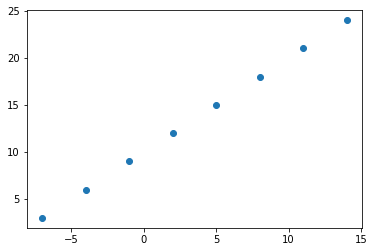

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y)

# Input and output shapes

In [3]:
# Create a demo tesnor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turn out NumPy arrays into tensors
x = tf.constant(X)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [6]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

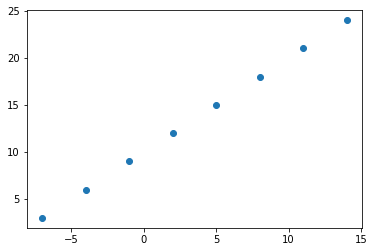

In [7]:
plt.scatter(x, y)

## Seteps in modelling with Tensor Flow
1. Creating a model - define the input and output layers, as well as the hidden layers of a dep learning model
2. Comiling a model - define the loss function (in other words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to impore the patterns its learning) and evaluatinon metrics (what we can use to interpret the performance of out model).
3. fitting a model - letting the model try to find patterns between x and y (features and labels).

In [8]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and make a prediction 
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 72ms/step


array([[12.716021]], dtype=float32)

# Improving our model
1. Creating a model - increase the number of hidden unitts, within each of hiden layers, change the activatioin function of each layer
2. Compiling a model  - optimization function or perhaps the learning rate of the optimization function
3. Fiting a model - more epochs or on more data

we can imporve our model, by altering the steps we took to create a model

In [11]:
# Lets rebuild our model

# 1. Create a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

# 2. Compile our model
model.compile(
    optimizer="SGD",
    loss="mae",
    metrics=["mae"]
)

# 3. Fiting a modell
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 363ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 7m

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 42ms/step


array([[29.739855]], dtype=float32)

## Trying out by myself

In [14]:
try_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

try_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    loss="mae",
    metrics=["mae"]
)

try_model.fit(tf.expand_dims(x, axis=-1), y, epochs=150)

Epoch 1/150


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 394ms/step - loss: 12.9513 - mae: 12.9513
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 12.5285 - mae: 12.5285
Epoch 3/150
1/1 [==============================] - 0s 8ms/step - loss: 12.1098 - mae: 12.1098
Epoch 4/150
1/1 [==============================] - 0s 10ms/step - loss: 11.6979 - mae: 11.6979
Epoch 5/150
1/1 [==============================] - 0s 7ms/step - loss: 11.2893 - mae: 11.2893
Epoch 6/150
1/1 [==============================] - 0s 9ms/step - loss: 10.8901 - mae: 10.8901
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 10.5068 - mae: 10.5068
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 10.1209 - mae: 10.1209
Epoch 9/150
1/1 [==============================] - 0s 8ms/step - loss: 9.7311 - mae: 9.7311
Epoch 10/150
1/1 [==============================] - 0s 8ms/step - loss: 9.3167 - mae: 9.3167
Epoch 11/150
1/1 [==============================] - 0s 7ms/step - loss: 

In [15]:
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
try_model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[26.466322]], dtype=float32)

## Leta try from daniel point of view

In [17]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=['mae']
)

model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 291ms/step - loss: 13.4562 - mae: 13.4562
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7552 - mae: 9.7552
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 6.4155 - mae: 6.4155
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 5.3552 - mae: 5.3552
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 4.3834 - mae: 4.3834
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0557 - mae: 5.0557
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 2.5948 - mae: 2.5948
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 3.6068 - mae: 3.6068
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 3.5253 - mae: 3.5253
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7240 - mae: 1.7240
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 1.9

In [18]:
tf.expand_dims(x, axis=-1), x, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 49ms/step


array([[26.669693]], dtype=float32)

#Evaluting a Model

In practice, atypical workflow you'll go through when building newural networks is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it ->evaluate it .....



# When it comes to evaluation... you should visualize

Its a good idea to visualize
The data - what data are we working with? What dows it look like?

In [20]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)

# Make label for the dataset
Y = X + 10

X, Y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

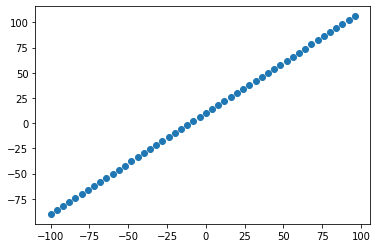

In [21]:
#Lets visualize the data
plt.scatter(X, Y)

In [22]:
X[:80], Y[:20]

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14], dtype=int32)>)

## The 3 set 

1. Training set - 70-80% of total data you have available.
2. Validation set - 10-15% data
3. Test set - 10-15% of tatal data available

In [23]:
# Check the lenth of how many samples we have
len(X)

x_train = X[:int(abs(len(X)/100*80))]
y_train = Y[:int(abs(len(Y)/100*80))]

x_test = X[40:]
y_test = Y[40:]

len(x_train), len(x_test)

(40, 10)

### Visualing the data

Now we've got our data in training and test sets... let's visualize it again!

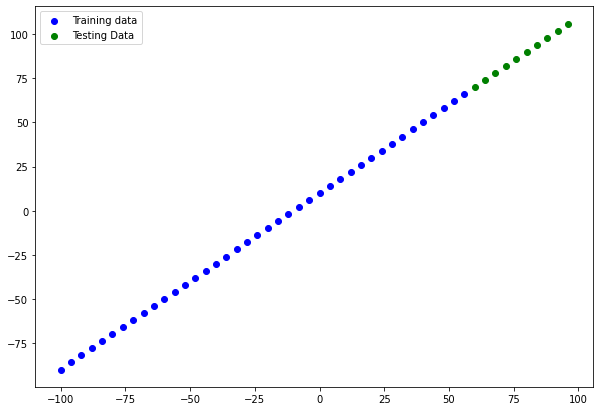

In [24]:
plt.figure(figsize=(10, 7))

#Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')

# Plot test data in green
plt.scatter(x_test, y_test, c='g', label='Testing Data')
plt.legend()

plt.show()

In [25]:
# Lets have a look at how to build the neural network

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
# model.fit(x_train, y_train, epochs=100)



## Visualizing the model

In [26]:
# model.summary() ## this model is not yet build

# model.build()
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [27]:
# Lets create a model which automatically by defining the input_shape argument
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(100, activation=None, name='hiddin_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=['mae']
)


In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 hiddin_layer (Dense)        (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - parameters (patterns) the model can update as it trains.
* Non-trainable params - parameters aren't updated during training (this is typical whwn you bring in already learn patterns or parameters from other models during ** transfer learning **).

In [29]:
model.fit(x_train, y_train, epochs=100, verbose=0)

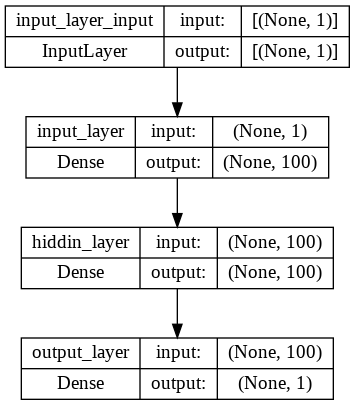

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing  our model's prediction

to visualize prediction, it's a good idea to plot them against the ground truth labels.

Often youll see this in the form of y_test or y_true versus y_pred.

In [31]:
# Make some prediction
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[ 68.780556],
       [ 72.69517 ],
       [ 76.609764],
       [ 80.52437 ],
       [ 84.438965],
       [ 88.35357 ],
       [ 92.268166],
       [ 96.18278 ],
       [100.097374],
       [104.01197 ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
# Let's create a plotting function
def plot_pred(train_data=x_train,
              train_labels=y_train,
              test_data=x_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plots training data, test data and compares prediction to ground truth
    """

    plt.figure(figsize=(10, 7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot training data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing data")

    # Plot model's prediction
    plt.scatter(test_data, predictions, c='r', label="Predictions")

    plt.legend();
    


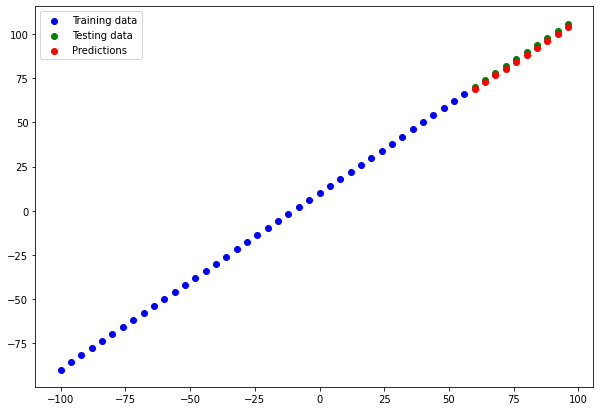

In [34]:
plot_pred()

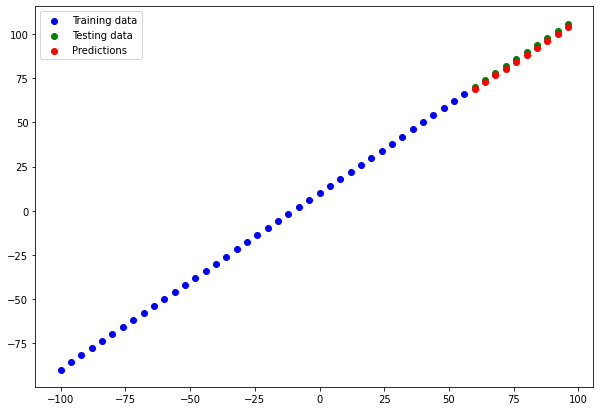

In [35]:

plot_pred(x_train, y_train, x_test, y_test, y_pred)

#E Evaluting our model's predictions with regression evaluation metrics

mani matrics : 1. MAE - mean absolute error\n
               2. MSE - mean square error -> square the average error

In [36]:
## Regression evaluation
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 1.6037 - mae: 1.6037


[1.6037323474884033, 1.6037323474884033]

In [37]:
# Calcultate themean absolute error
tf.metrics.mean_absolute_error(tf.reshape(y_test, shape=(10, 1)), tf.reshape(y_pred, shape=(10, 1))).numpy()

array([1.2194443, 1.3048325, 1.3902359, 1.4756317, 1.5610352, 1.646431 ,
       1.7318344, 1.8172226, 1.902626 , 1.9880295], dtype=float32)

In [38]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.780556,  72.69517 ,  76.609764,  80.52437 ,  84.438965,
        88.35357 ,  92.268166,  96.18278 , 100.097374, 104.01197 ],
      dtype=float32)>

In [39]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=1.6037323>

In [40]:
# Calcultaing the mean square error
tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_pred))


<tf.Tensor: shape=(), dtype=float32, numpy=2.6321237>

In [41]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(100, activation=None, name='hiddin_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

model2.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    metrics=['mean_squared_error']
)


In [42]:
model2.evaluate(x_test, y_test)
y_pred = model2.predict(x_test)

1/1 [==============================] - 0s 142ms/step - loss: 9194.5107 - mean_squared_error: 9194.5107


1/1 [==============================] - 0s 51ms/step


In [43]:
tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=9194.511>

In [44]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=9194.511>

In [45]:
# Make some function to resue

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)


## tweak it

In [46]:
# Set random seed
tf.random.set_seed(43)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 42ms/step


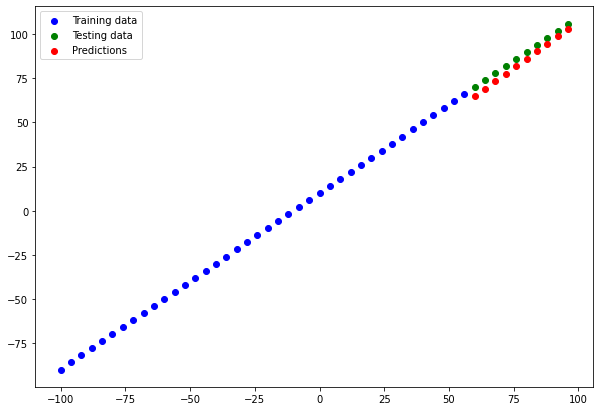

In [47]:
y_pred_1 = model_1.predict(x_test)
plot_pred(predictions=y_pred_1)

In [48]:
mae_1 = mae(y_test, tf.squeeze(y_pred_1))
mse_1 = mse(y_test, tf.squeeze(y_pred_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=3.9769294>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16.30638>)

In [49]:
## build model2
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

model_2.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 36ms/step


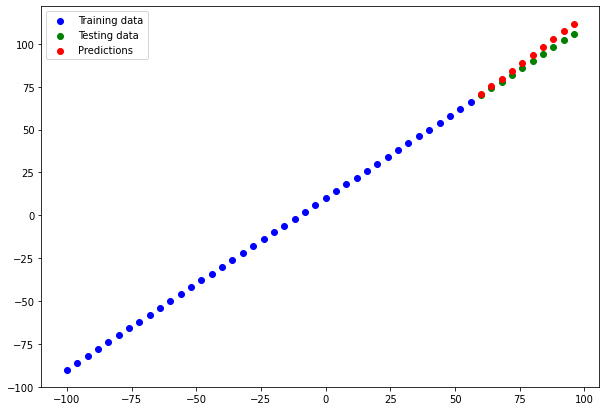

In [50]:
y_pred_2 = model_2.predict(x_test)
plot_pred(predictions=y_pred_2)

In [51]:
mae_2 = mae(y_test, tf.squeeze(y_pred_2))
mse_2 = mse(y_test, tf.squeeze(y_pred_1))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=16.30638>)

In [52]:
x_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
model_2.predict([-100]), model_1.predict([-100])

1/1 [==============================] - 0s 40ms/step


(array([[-112.95677]], dtype=float32), array([[-104.82652]], dtype=float32))

###  Lets Try Model 3

In [54]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_3.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 42ms/step


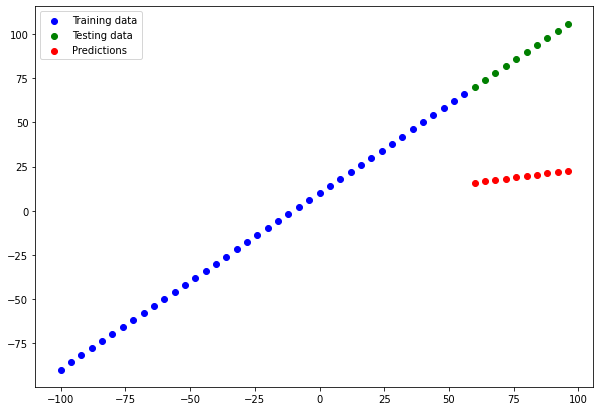

In [55]:

y_pred_3 = model_3.predict(x_test)
plot_pred(predictions=y_pred_3)

In [56]:
mse_3 = mse(y_test, tf.squeeze(y_pred))
mae_3 = mae(y_test, tf.squeeze(y_pred))

## Comparing our models

In [57]:
import pandas as pd

model_results = [['Model_1', mae_1.numpy(), mse_1.numpy()], ['Model_2', mae_2.numpy(), mse_2.numpy()], ['Model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", 'mae', 'mse'])

In [58]:
all_results

,model,mae,mse
0,Model_1,3.976929,16.306379
1,Model_2,3.196947,16.306379
2,Model_3,95.065842,9194.510742


Looks lide model_2 performed the best

In [59]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


ONe of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things youll figure out which dont work and in turn get closer to figuing out what does work. Remember the machine learning preactioner's moto : "experiment, experiment, experiment".

# Tracking your experiments

ONe really good habit in ML is to track the results of your experiments.

Luckily, there are tools to help us!

1. TensorBoard - componet the tensorFlow library
2. Weights and Biases - tool for tracking all kinds of ml experiments 


# Saving our models

In [64]:
#save model using save model format

model_2.save("Saved_Model/model_1_saveFormat")

In [65]:
model_2.save("Saved_Model/model_1_saveFormatHDF5.h5")

In [66]:
#Loading in the save model
import tensorflow as tf

In [67]:
load_saveModel_format = tf.keras.models.load_model('Saved_Model/model_1_saveFormat')
load_saveModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
load_saveModel_HDF5 = load_saveModel_HDF5 = tf.keras.models.load_model('Saved_Model/model_1_saveFormatHDF5.h5')
load_saveModel_HDF5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_2_preds = model_2.predict(x_test)
loaded_model = load_saveModel_format.predict(x_test)

model_2_preds == loaded_model

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
loaded_h5model = load_saveModel_HDF5.predict(x_test)


model_2_preds == loaded_h5model

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
## Download a model from Google Colab

In [72]:
# A larger example
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [74]:
# model = tf.keras.Seq....
insurance['sex'].dtype, insurance['age'].dtype

(dtype('O'), dtype('int64'))

In [75]:
insurance_temp = insurance
insurance_temp.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [76]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [77]:
# Create x and y values (featrues and labels)
# Create trainin and test sets
# Building a neural network

In [78]:
y = insurance_one_hot['charges']
# y = tf.constant(y)
insurance_one_hot.drop('charges', axis=1)
x = insurance_one_hot
# x = tf.constant(x)
x, y

(      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
 0      19  27.900         0  16884.92400           1         0          0   
 1      18  33.770         1   1725.55230           0         1          1   
 2      28  33.000         3   4449.46200           0         1          1   
 3      33  22.705         0  21984.47061           0         1          1   
 4      32  28.880         0   3866.85520           0         1          1   
 ...   ...     ...       ...          ...         ...       ...        ...   
 1333   50  30.970         3  10600.54830           0         1          1   
 1334   18  31.920         0   2205.98080           1         0          1   
 1335   18  36.850         0   1629.83350           1         0          1   
 1336   21  25.800         0   2007.94500           1         0          1   
 1337   61  29.070         0  29141.36030           1         0          0   
 
       smoker_yes  region_northeast  region_northwest  region_

In [79]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
len(X_train), len(y_train)

(1070, 1070)

In [127]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    # tf.keras.layers.Dense(10, activation=None),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['mae']
)

insurance_model.fit(X_train, y_train, epochs=300, verbose=0)

In [128]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 874.2817 - mae: 874.2817


[874.2816772460938, 874.2816772460938]

In [98]:
insurance_predict = insurance_model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [99]:
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plots training data, test data and compares prediction to ground truth
    """

    plt.figure(figsize=(10, 7))
    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot training data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing data")

    # Plot model's prediction
    plt.scatter(test_data, predictions, c='r', label="Predictions")

    plt.legend();
    

In [119]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [121]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

In [103]:
len(X_test), len(y_test)

(268, 268)

In [140]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    # tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics=['mae'])

history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 1376.3302 - mae: 1376.3302
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 598.4772 - mae: 598.4772
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 200.9528 - mae: 200.9528
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 213.2038 - mae: 213.2038
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 444.4887 - mae: 444.4887
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 820.4113 - mae: 820.4113
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 416.2483 - mae: 416.2483
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 232.5223 - mae: 232.5223
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 259.1342 - mae: 259.1342
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 376.7535 - mae: 376.7535
Epoch 11/200
34/3

In [141]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 94.4686 - mae: 94.4686


[94.4686050415039, 94.4686050415039]

Text(0.5, 0, 'epochs')

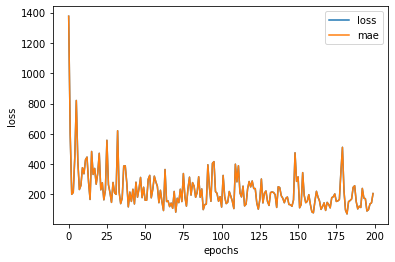

In [143]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Preprocessing data (normalization and standardization)

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [145]:
# To prepare our data, we can borrow a few classes from Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create x and y 
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with mormalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [148]:
X_train_normal[:5], X_train.head()

(array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 1.        ,
         0.        ],
        [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),       age     sex    bmi  children smoker     region
 560    46  female  19.95         2     no  northwest
 1285   47  female  24.32         0     no  northeast
 1142   52  female  24.86         0  

In [149]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! our data has been normalized and one hot encoded.

In [158]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

insurance_model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 13268.4131 - mae: 13268.4131
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11758.2910 - mae: 11758.2910
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 8331.9404 - mae: 8331.9404
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7720.1050 - mae: 7720.1050
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7276.6665 - mae: 7276.6665
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6780.6899 - mae: 6780.6899
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6023.8081 - mae: 6023.8081
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4972.7949 - mae: 4972.7949
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 4015.7571 - mae: 4015.7571
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3681.2239 - mae: 3681.

In [159]:
insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3177.2156 - mae: 3177.2156


[3177.215576171875, 3177.215576171875]

In [161]:
insurance_model_1.predict(X_test_normal)

9/9 [==============================] - 0s 2ms/step


array([[ 8955.09   ],
       [ 5745.225  ],
       [44042.96   ],
       [ 9063.712  ],
       [32220.574  ],
       [ 5533.315  ],
       [  953.0847 ],
       [13113.884  ],
       [ 3329.815  ],
       [ 9985.897  ],
       [35567.3    ],
       [ 7579.621  ],
       [ 3958.5427 ],
       [40637.434  ],
       [43001.805  ],
       [40329.89   ],
       [10205.106  ],
       [40126.184  ],
       [ 8323.647  ],
       [38560.953  ],
       [ 3917.2383 ],
       [ 7804.0547 ],
       [  619.84656],
       [ 2826.5134 ],
       [10532.982  ],
       [10843.654  ],
       [11857.653  ],
       [ 4636.5273 ],
       [ 9544.464  ],
       [  392.43765],
       [ 7993.254  ],
       [11312.446  ],
       [ 1711.8442 ],
       [ 4926.302  ],
       [ 2835.893  ],
       [ 8517.663  ],
       [ 1673.639  ],
       [ 7581.9336 ],
       [41187.914  ],
       [36874.195  ],
       [ 2885.7986 ],
       [ 2247.9968 ],
       [11254.107  ],
       [11221.086  ],
       [ 5388.21   ],
       [11